In [1]:
import pandas as pd
import numpy as np
import seaborn as sb

In [2]:
data = {}

# Method 1: Import with pandas

In [3]:
df = pd.read_csv("titanic-1.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Method 2: Reading from Scratch

In [6]:
data_scratch = {}
keys = []
with open("titanic-1.csv") as file:
    for line in file:
        line_split = line.split(',')
        line_split[-1] = (line_split[-1].rstrip())
        if (len(keys)  == 0):
            keys = line_split
            for key in keys:
                data_scratch[key] = [];
        else:
            # https://www.geeksforgeeks.org/python-convert-two-lists-into-a-dictionary/
            process_line = []
            if (len(line_split) > len(keys)):
                process_line = (line_split[0:3], [line_split[3] + line_split[4]], line_split[5:])
                process_line = [
                    x 
                    for xs in process_line
                    for x in xs
                ]
            else:
                process_line = line_split
            
            for i, key in enumerate(keys):
                data_scratch[key].append(process_line[i])
            # Just do a comma split and connect thingies together...
            # process_line = np.concatenate((line_split[0].split(',')[0:3], line_split[1], line_split[2].split(',')[1:]))
            # data_entry = dict(map(lambda i,j : (i,j), keys, process_line))
            # data_scratch.append(data_entry)
            # hello[key] = data_entry

In [7]:
df_scratch = pd.DataFrame(data_scratch)

In [8]:
df_scratch

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"""Braund Mr. Owen Harris""",male,22,1,0,A/5 21171,7.25,,S
1,2,1,1,"""Cumings Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"""Heikkinen Miss. Laina""",female,26,0,0,STON/O2. 3101282,7.925,,S
3,4,1,1,"""Futrelle Mrs. Jacques Heath (Lily May Peel)""",female,35,1,0,113803,53.1,C123,S
4,5,0,3,"""Allen Mr. William Henry""",male,35,0,0,373450,8.05,,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"""Montvila Rev. Juozas""",male,27,0,0,211536,13,,S
887,888,1,1,"""Graham Miss. Margaret Edith""",female,19,0,0,112053,30,B42,S
888,889,0,3,"""Johnston Miss. Catherine Helen """"Carrie""""""",female,,1,2,W./C. 6607,23.45,,S
889,890,1,1,"""Behr Mr. Karl Howell""",male,26,0,0,111369,30,C148,C


In [9]:
df_scratch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    object
 1   Survived     891 non-null    object
 2   Pclass       891 non-null    object
 3   Name         891 non-null    object
 4   Sex          891 non-null    object
 5   Age          891 non-null    object
 6   SibSp        891 non-null    object
 7   Parch        891 non-null    object
 8   Ticket       891 non-null    object
 9   Fare         891 non-null    object
 10  Cabin        891 non-null    object
 11  Embarked     891 non-null    object
dtypes: object(12)
memory usage: 83.7+ KB


In [10]:
df_scratch.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891,891,891,891,891,891,891,891,891,891,891,891
unique,891,2,3,891,2,89,7,7,681,248,148,4
top,891,0,3,"""Dooley Mr. Patrick""",male,,0,0,347082,8.05,,S
freq,1,549,491,1,577,177,608,678,7,43,687,644


In [11]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
df[["Pclass", "SibSp", "Parch", "Fare", "Cabin"]].nunique()

Pclass      3
SibSp       7
Parch       7
Fare      248
Cabin     147
dtype: int64

In [14]:
df[["Pclass", "SibSp", "Parch", "Fare", "Cabin"]].describe()

,Pclass,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.523008,0.381594,32.204208
std,0.836071,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,7.910400
50%,3.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,0.000000,31.000000
max,3.000000,8.000000,6.000000,512.329200


In [15]:
df[["Cabin", "Pclass", "Sex", "Embarked"]] = df[["Cabin", "Pclass", "Sex", "Embarked"]].astype("category")

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    category
 11  Embarked     889 non-null    category
dtypes: category(4), float64(2), int64(4), object(2)
memory usage: 65.8+ KB


In [17]:
df.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

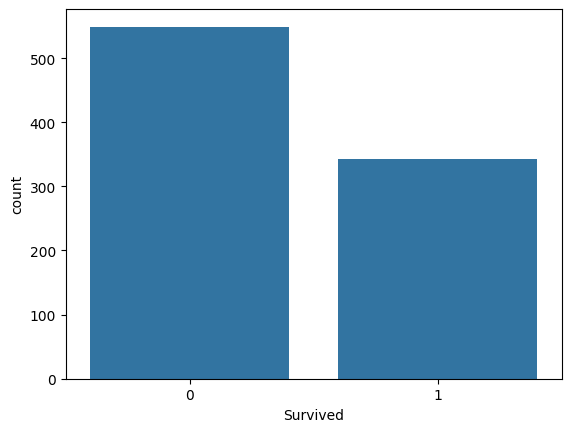

In [18]:
sb.countplot(df, x="Survived")

In [19]:
df["Age_fill_mean"]=df["Age"]
df["Age_fill_median"]=df["Age"]
df["Age_fill_mode"]=df["Age"]
df["Age_fill_knn"]=df["Age"]

In [39]:
df["Age_fill_mean"]=df["Age_fill_mean"].fillna(df["Age"].mean())
df["Age_fill_median"]=df["Age_fill_median"].fillna(df["Age"].median())
df["Age_fill_mode"]=df["Age_fill_mode"].fillna(df["Age"].mode()[0])

In [40]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_fill_mean,Age_fill_median,Age_fill_mode,Age_fill_knn
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.000000,22.0,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.000000,38.0,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.000000,26.0,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.000000,35.0,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.000000,35.0,35.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,27.000000,27.0,27.0,27.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,19.000000,19.0,19.0,19.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,29.699118,28.0,24.0,26.8
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,26.000000,26.0,26.0,26.0


In [22]:
from sklearn.neighbors import KNeighborsRegressor 

In [23]:
df["Age"].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [24]:
data_drop_age_na = df[df["Age"].notna()]
data_age_na = df[df["Age"].isna()]

In [25]:
data_age_na

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_fill_mean,Age_fill_median,Age_fill_mode,Age_fill_knn
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,29.699118,NaN,NaN,NaN
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,29.699118,NaN,NaN,NaN
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,29.699118,NaN,NaN,NaN
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,29.699118,NaN,NaN,NaN
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,29.699118,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,29.699118,NaN,NaN,NaN
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,29.699118,NaN,NaN,NaN
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,29.699118,NaN,NaN,NaN
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,29.699118,NaN,NaN,NaN


In [26]:
data_drop_age_na

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_fill_mean,Age_fill_median,Age_fill_mode,Age_fill_knn
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,26.0,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,35.0,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,35.0,35.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,39.0,39.0,39.0,39.0
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,27.0,27.0,27.0,27.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,19.0,19.0,19.0,19.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,26.0,26.0,26.0,26.0


In [27]:
knn = KNeighborsRegressor(n_neighbors=5)

X = data_drop_age_na[["SibSp", "Parch", "Fare"]]
y = data_drop_age_na["Age"]

knn.fit(X, y)

KNeighborsRegressor()

In [28]:
y_pred = knn.predict(data_age_na[["SibSp", "Parch", "Fare"]])

In [29]:
pd.Series(y_pred)

0      24.8
1      32.7
2      32.5
3      32.5
4      27.8
       ... 
172    21.4
173    37.0
174    26.2
175    30.8
176    26.8
Length: 177, dtype: float64

In [30]:
data_age_na["Age"] = y_pred

C:\Users\daoa\AppData\Local\Temp\ipykernel_11068\2360103627.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_age_na["Age"] = y_pred


In [31]:
df["Age_fill_knn"].fillna(pd.Series(y_pred))

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age_fill_knn, Length: 891, dtype: float64

In [32]:
df_new = pd.concat([data_age_na, data_drop_age_na])

In [33]:
df_new = df_new.sort_values(by="PassengerId")

In [34]:
df["Age_fill_knn"] = df_new["Age"]

In [35]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_fill_mean,Age_fill_median,Age_fill_mode,Age_fill_knn
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.000000,22.0,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.000000,38.0,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.000000,26.0,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.000000,35.0,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.000000,35.0,35.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,27.000000,27.0,27.0,27.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,19.000000,19.0,19.0,19.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,29.699118,NaN,NaN,26.8
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,26.000000,26.0,26.0,26.0


In [43]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Age')

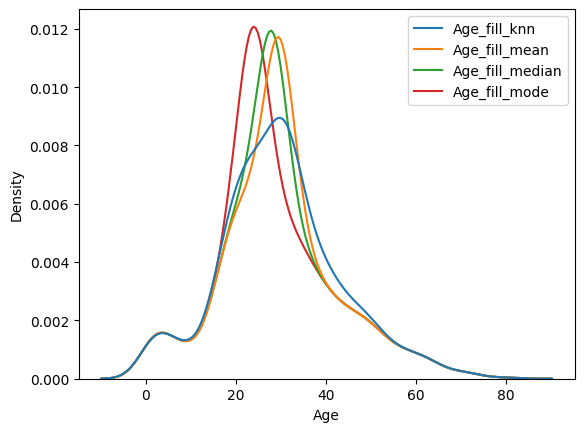

In [44]:
sb.kdeplot(df[["Age_fill_knn", "Age_fill_mean", "Age_fill_median", "Age_fill_mode"]])
plt.xlabel("Age")